In [47]:
import numpy as np
import scipy.fft as spfft
import math
import matplotlib.pyplot as plt

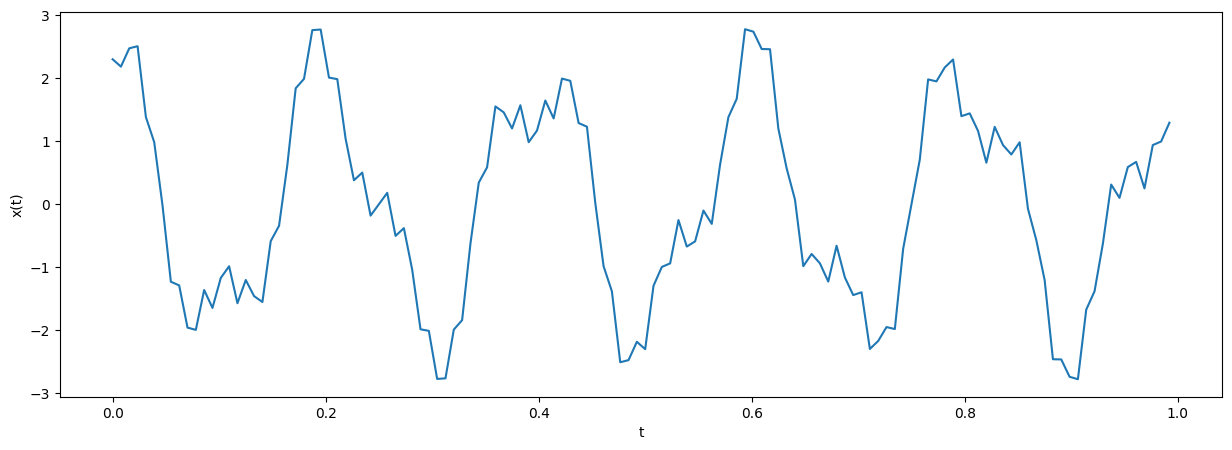

In [48]:
# sinal 1
T = 1; 
N = 128; 
t = np.arange(0, T, 1/N); 
plt.figure(figsize=(15,5))
x = 2*np.cos(2*math.pi*5*t) + 0.8*np.sin(2*math.pi*12*t) + 0.3*np.cos(2*math.pi*47*t)
plt.plot(t,x); 
plt.xlabel("t"); 
plt.ylabel("x(t)");

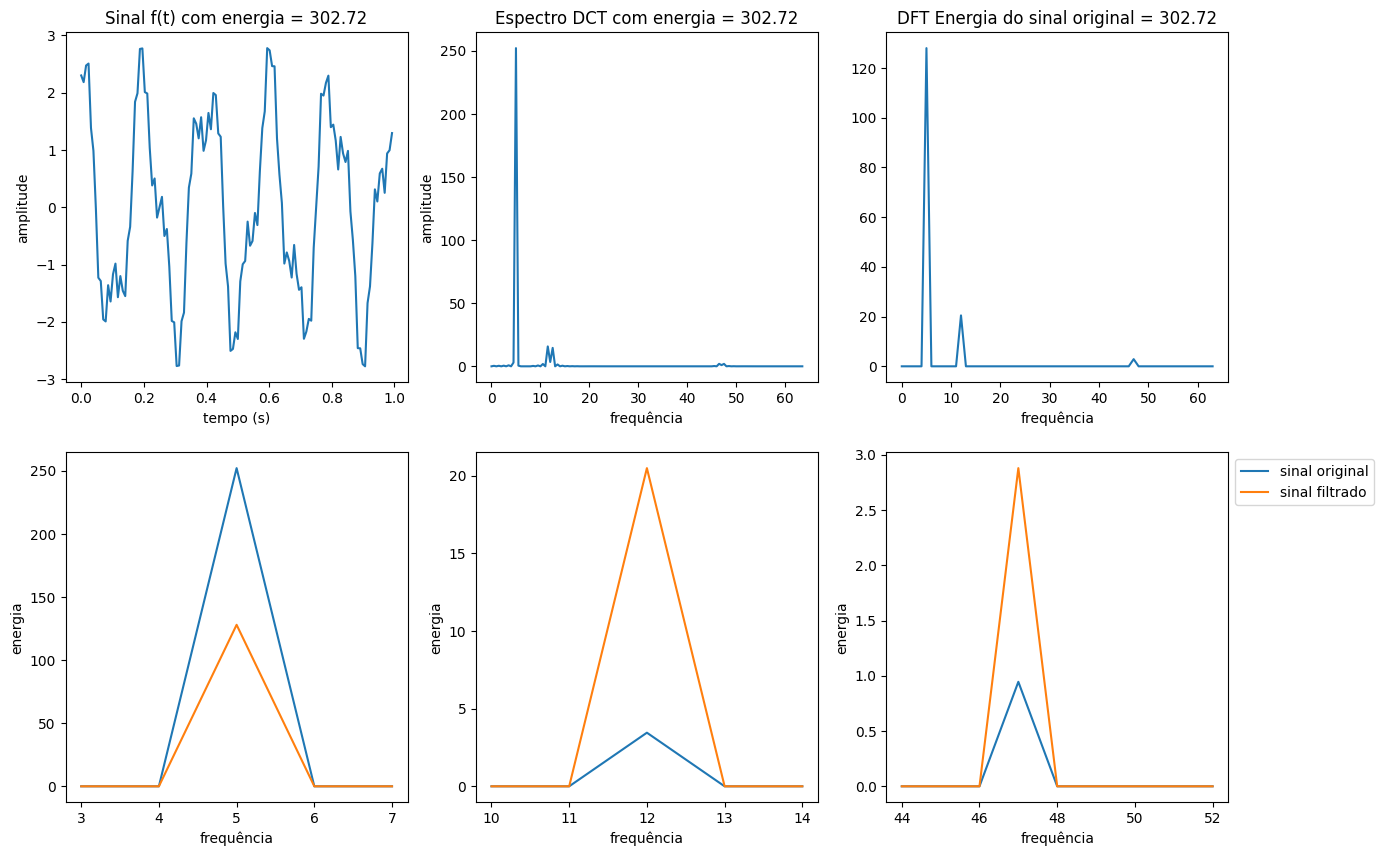

In [70]:
def plot_func_dct(t,f):
    N = len(t)
    
    

    fig, ax = plt.subplots(2,3,figsize=(15,10))
    ax[0][0].set_title(f'Sinal f(t) com energia = {np.linalg.norm(f)**2:.2f}')
    ax[0][0].plot(t,f)
    ax[0][0].set_xlabel('tempo (s)')
    ax[0][0].set_ylabel('amplitude')
    
    
    F = spfft.dct(f, norm='ortho')
    E_dct = abs(F)**2
    E_dct_ajustada = np.zeros(N//2)
    for i in range(len(E_dct_ajustada)):
        E_dct_ajustada[i] = E_dct[i*2]
     
    ax[0][1].set_title(f'Espectro DCT com energia = {np.sum(E_dct):.2f}')
    ax[0][1].plot(np.arange(0,N//2,0.5),E_dct)
    ax[0][1].set_xlabel('frequência')
    ax[0][1].set_ylabel('amplitude')
#     print(f'dct:{F}')
    
    X= spfft.fft(x);
    c = X / (N);
    E = N * abs(c)**2
    ax[0][2].plot(E[0:int(N/2)]);
    ax[0][2].set_title(f"DFT Energia do sinal original = {np.sum(E):.2f}");
    ax[0][2].set_xlabel('frequência')

#     print(f'dft:{c}')



    ax[1][0].plot(np.arange(3,8),E_dct_ajustada[3:8], label='sinal original');
    ax[1][0].plot(np.arange(3,8),E[3:8], label='sinal filtrado')

    ax[1][1].plot(np.arange(10,15),E_dct_ajustada[10:15], label='sinal original');
    ax[1][1].plot(np.arange(10,15),E[10:15], label='sinal filtrado')

    
    ax[1][2].plot(np.arange(44,53),E_dct_ajustada[44:53], label='sinal original');
    ax[1][2].plot(np.arange(44,53),E[44:53], label='sinal filtrado')

    for i in range(3):
        ax[1][i].set_xlabel('frequência')
        ax[1][i].set_ylabel('energia')

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
#     plt.show()

    plt.show()

plot_func_dct(t,x)

In [67]:
def build_DCT_base(N=4):
    res = np.zeros((N,N))
    k = np.arange(1, N, 1).reshape((N-1,1))
    m = np.arange(0, N, 1).reshape((1,N))
    fatores = k * m
    res[0:] = np.sqrt(1/N)
    res[1:] = np.sqrt(2/N) * np.cos(math.pi*k*(m+0.5)/N )
    return res

def dct2(x):
    N = len(x)
    base = build_DCT_base(N)
    res = np.matmul(base, x)
    return res

def idct2(C):
    N = len(C)
    base_t = build_DCT_base(N).T
    res = np.matmul(base_t, C)
    return res

np.allclose( idct2(dct2(x)),x)

False

True